Tutto il materiale è disponibile nel seguente repository Github: 
[cloud-computing-project](https://github.com/AndreaBe99/cloud-computing-project)

## Use Pycaret to build the model

In [ ]:
# after execution of code chunk done click *restart runtime button. 
# after install if its succesfully import libraries skip markupsafe phase.
!pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 10.2 MB/s 
     |████████████████████████████████| 6.8 MB 32.5 MB/s 
     |████████████████████████████████| 10.4 MB 43.8 MB/s 
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 88 kB 5.1 MB/s 
     |████████████████████████████████| 17.9 MB 9.3 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 125 kB 49.4 MB/s 
     |████████████████████████████████| 2.0 MB 65.8 MB/s 
     |████████████████████████████████| 167 kB 80.0 MB/s 
     |████████████████████████████████| 1.7 MB 56.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 68.1 MB/s 
     |████████████████████████████████|

In [ ]:
# after execution of code chunk done click *restart runtime button.
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import jinja2
from pycaret.classification import *
#from pycaret.utils import version
#from pycaret.arules import *

#version()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import pandas as pd
import numpy as np
import time
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Download Datasets

In [ ]:
#loading the final dataset
PATH = "https://raw.githubusercontent.com/AndreaBe99/cloud-computing-project/main/datasets/"

A_11_12 = PATH + "I_A_11-12.csv"
A_12_13 = PATH + "I_A_12-13.csv"
A_13_14 = PATH + "I_A_13-14.csv"
A_14_15 = PATH + "I_A_14-15.csv"
A_15_16 = PATH + "I_A_15-16.csv"
A_16_17 = PATH + "I_A_16-17.csv"
A_17_18 = PATH + "I_A_17-18.csv"
A_18_19 = PATH + "I_A_18-19.csv"
A_19_20 = PATH + "I_A_19-20.csv"
A_20_21 = PATH + "I_A_20-21.csv"
A_21_22 = PATH + "I_A_21-22.csv"

# Local
# path = "final_dataset.csv"
serie_a_11_12 = pd.read_csv(A_11_12, low_memory=False, na_values = [" n.a."])
serie_a_11_12["season"] = 2011

serie_a_12_13 = pd.read_csv(A_12_13, low_memory=False, na_values = [" n.a."])
serie_a_12_13["season"] = 2012

serie_a_13_14 = pd.read_csv(A_13_14, low_memory=False, na_values = [" n.a."])
serie_a_13_14["season"] = 2013

serie_a_14_15 = pd.read_csv(A_14_15, low_memory=False, na_values = [" n.a."])
serie_a_14_15["season"] = 2014

serie_a_15_16 = pd.read_csv(A_15_16, low_memory=False, na_values = [" n.a."])
serie_a_15_16["season"] = 2015

serie_a_16_17 = pd.read_csv(A_16_17, low_memory=False, na_values = [" n.a."])
serie_a_16_17["season"] = 2016

serie_a_17_18 = pd.read_csv(A_17_18, low_memory=False, na_values = [" n.a."])
serie_a_17_18["season"] = 2017

serie_a_18_19 = pd.read_csv(A_18_19, low_memory=False, na_values = [" n.a."])
serie_a_18_19["season"] = 2018

serie_a_19_20 = pd.read_csv(A_19_20, low_memory=False, na_values = [" n.a."])
serie_a_19_20["season"] = 2019

serie_a_20_21 = pd.read_csv(A_20_21, low_memory=False, na_values = [" n.a."])
serie_a_20_21["season"] = 2020

serie_a_21_22 = pd.read_csv(A_21_22, low_memory=False, na_values = [" n.a."])
serie_a_21_22["season"] = 2021

all_season = pd.concat([serie_a_11_12, serie_a_12_13, serie_a_13_14, 
                        serie_a_14_15, serie_a_15_16, serie_a_16_17, 
                        serie_a_17_18, serie_a_18_19, serie_a_19_20, 
                        serie_a_20_21, serie_a_21_22], axis=0)

In [ ]:
all_season.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,09/09/11,Milan,Lazio,2.0,2.0,D,2.0,2.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I1,10/09/11,Cesena,Napoli,1.0,3.0,A,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I1,11/09/11,Catania,Siena,0.0,0.0,D,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I1,11/09/11,Chievo,Novara,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I1,11/09/11,Fiorentina,Bologna,2.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_season.shape

(4185, 139)

# Features

Notes for Football Data

All data is in csv format, ready for use within standard spreadsheet applications. Please note that some abbreviations are no longer in use (in particular odds from specific bookmakers no longer used) and refer to data collected in earlier seasons. For a current list of what bookmakers are included in the dataset please visit http://www.football-data.co.uk/matches.php

Key to results data:
- Div = League Division
- Date = Match Date (dd/mm/yy)
- Time = Time of match kick off
- HomeTeam = Home Team
- AwayTeam = Away Team
- FTHG and HG = Full Time Home Team Goals
- FTAG and AG = Full Time Away Team Goals
- FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- HTHG = Half Time Home Team Goals
- HTAG = Half Time Away Team Goals
- HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
- Attendance = Crowd Attendance
- Referee = Match Referee
- HS = Home Team Shots
- AS = Away Team Shots
- HST = Home Team Shots on Target
- AST = Away Team Shots on Target
- HHW = Home Team Hit Woodwork
- AHW = Away Team Hit Woodwork
- HC = Home Team Corners
- AC = Away Team Corners
- HF = Home Team Fouls Committed
- AF = Away Team Fouls Committed
- HFKC = Home Team Free Kicks Conceded
- AFKC = Away Team Free Kicks Conceded
- HO = Home Team Offsides
- AO = Away Team Offsides
- HY = Home Team Yellow Cards
- AY = Away Team Yellow Cards
- HR = Home Team Red Cards
- AR = Away Team Red Cards
- HBP = Home Team Bookings Points (10 = yellow, 25 = red)
- ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Key to 1X2 (match) betting odds data:
- B365H = Bet365 home win odds
- B365D = Bet365 draw odds
- B365A = Bet365 away win odds
- BSH = Blue Square home win odds
- BSD = Blue Square draw odds
- BSA = Blue Square away win odds
- BWH = Bet&Win home win odds
- BWD = Bet&Win draw odds
- BWA = Bet&Win away win odds

Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.

Closing odds (last odds before match starts)

As above but with an additional "C" character following the bookmaker abbreviation/Max/Avg.

Football-Data would like to acknowledge the following sources which have been utilised in the compilation of Football-Data's results and odds files.


Current results (full time, half time)
XScores - http://www.xscores .com

Match statistics: BBC, ESPN Soccer, Bundesliga.de, Gazzetta.it and Football.fr

Bookmakers betting odds.
Individual bookmakers.

Betting odds for weekend games are collected Friday afternoons, and on Tuesday afternoons for midweek games.

Additional match statistics (corners, shots, bookings, referee etc.) for the 2000/01 and 2001/02 seasons for the English, Scottish and German leagues were provided by Sports.com (now under new ownership and no longer available).


In [ ]:
col = list(all_season.columns)

all_season.keys()

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=139)

In [ ]:
# Delete useless features
col_reduction = col[:28]
col_reduction.append("season")

all_season_no_odds = all_season[col_reduction]
all_season_no_odds.keys()

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'season'],
      dtype='object')

In [ ]:
all_season_no_odds.isnull().sum()

Div          5
Date         5
HomeTeam     5
AwayTeam     5
FTHG         5
FTAG         5
FTR          5
HTHG         7
HTAG         7
HTR          7
HS           6
AS           6
HST          6
AST          6
HF           6
AF           6
HC           6
AC           6
HY           7
AY           6
HR           6
AR           6
B365H        8
B365D        8
B365A        8
BWH         10
BWD         10
BWA         10
season       0
dtype: int64

In [ ]:
# Apply Imputer to fill Null Value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

for col in all_season_no_odds.columns:
  all_season_no_odds[col] = imp.fit_transform(all_season_no_odds[[col]])

all_season_no_odds.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
BWH         0
BWD         0
BWA         0
season      0
dtype: int64

### Add Match Point Features

In [ ]:
# Convert Date Column to Datetime
all_season_no_odds['Date'] = pd.to_datetime(all_season_no_odds.Date)

# Sort By Date
all_season_no_odds = all_season_no_odds.sort_values(by="Date")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Create two features two show the Teams Match Point

# home points made in each match
all_season_no_odds['h_match_points'] = np.where(all_season_no_odds['FTR'] == 'H', 3 , np.where(all_season_no_odds['FTR'] == 'D',1, 0))

# away points made in each match
all_season_no_odds['a_match_points'] = np.where(all_season_no_odds['FTR'] == 'A', 3 , np.where(all_season_no_odds['FTR'] == 'D',1, 0))

In [ ]:
df = all_season_no_odds.copy()
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'season', 'h_match_points', 'a_match_points'],
      dtype='object')

## Define Functions to create new Features

In [ ]:
def get_rank(x, team, delta_year):
    full_season_df = df[(df["season"] == (x["season"] - delta_year))]

    full_home_df = full_season_df.groupby(['HomeTeam']).sum()[['h_match_points', 'FTHG', 'FTAG']].reset_index()
    full_home_df.columns = ['team', 'points', 'goals', 'goals_sf']

    full_away_df = full_season_df.groupby(['AwayTeam']).sum()[['a_match_points', 'FTAG', 'FTHG']].reset_index()
    full_away_df.columns = ['team', 'points', 'goals', 'goals_sf']

    rank_df = pd.concat([full_home_df, full_away_df], ignore_index = True)
    rank_df['goals_df'] = rank_df.goals - rank_df.goals_sf
    rank_df = rank_df.groupby(['team']).sum().reset_index()
    rank_df = rank_df.sort_values(by = ['points', 'goals_df', 'goals'], ascending = False)
    rank_df['rank'] = rank_df.points.rank(method = 'first', ascending = False).astype(int)

    team_rank = rank_df[rank_df.team == team].min()['rank']

    return team_rank

In [ ]:
def get_match_stats(x, team):
    #home df filter    
    home_df = df[(df.HomeTeam == team) & (df.Date < x.Date) & (df.season == x.season)]

    #home df filter
    away_df = df[(df.AwayTeam == team) & (df.Date < x.Date) & (df.season == x.season)]

    #points
    home_table = home_df.groupby(['Date']).sum()[['h_match_points', 'FTHG', 'FTAG']].reset_index()
    home_table.columns = ['Date', 'points', 'goals', 'goals_sf']
    home_table['goals_df'] = home_table.goals - home_table.goals_sf
    home_table['host'] = 'home'

    away_table = away_df.groupby(['Date']).sum()[['a_match_points', 'FTAG', 'FTHG']].reset_index()
    away_table.columns = ['date', 'points', 'goals', 'goals_sf']
    away_table['goals_df'] = away_table.goals - away_table.goals_sf
    away_table['host'] = 'away'

    full_table = pd.concat([home_table, away_table], ignore_index = True)
    full_table = full_table.sort_values('Date', ascending = True)

    #get streaks
    full_table['start_of_streak'] = full_table.points.ne(full_table.points.shift())
    full_table['streak_id'] = full_table['start_of_streak'].cumsum()
    full_table['streak_counter'] = full_table.groupby('streak_id').cumcount() + 1

    #make exponentially weighted average
    full_table['w_avg_points'] = full_table.points.ewm(span=3, adjust=False).mean()
    full_table['w_avg_goals'] = full_table.goals.ewm(span=3, adjust=False).mean()
    full_table['w_avg_goals_sf'] = full_table.goals_sf.ewm(span=3, adjust=False).mean()

    streak_table = full_table[full_table.Date == full_table.Date.max()]

    if streak_table.points.min() == 3:
        win_streak = streak_table.streak_counter.sum()
        loss_streak = 0
        draw_streak = 0
    elif streak_table.points.min() == 0:
        win_streak = 0
        loss_streak = streak_table.streak_counter.sum()
        draw_streak = 0
    else:
        win_streak = 0
        loss_streak = 0
        draw_streak = streak_table.streak_counter.sum()
    
    home_points = home_table.points.sum()
    home_goals = home_table.goals.sum()
    home_goals_sf = home_table.goals_sf.sum()
    home_wins = len(home_table[home_table.points == 3])
    home_draws = len(home_table[home_table.points == 1])
    home_losses = len(home_table[home_table.points == 0])


    away_points = away_table.points.sum()
    away_goals = away_table.goals.sum()
    away_goals_sf = away_table.goals_sf.sum()
    away_wins = len(away_table[away_table.points == 3])
    away_draws = len(away_table[away_table.points == 1])
    away_losses = len(away_table[away_table.points == 0])

    #total points stats
    total_points = home_points + away_points
    total_goals = home_goals + away_goals
    total_goals_sf = home_goals_sf + away_goals_sf
    total_wins = home_wins + away_wins
    total_draws = home_draws + away_draws
    total_losses = home_losses + away_losses
    
    #getting data for a given delta
    full_table_delta = full_table[full_table.Date.isin(full_table.Date[-3:])]

    home_l_points = full_table_delta[full_table_delta.host == 'home'].points.sum()
    away_l_points = full_table_delta[full_table_delta.host == 'away'].points.sum()

    #total metric in given delta averaged
    total_l_points = (home_l_points + away_l_points)/3
    total_l_goals = (home_goals + away_goals)/3
    total_l_goals_sf = (home_goals_sf + away_goals)/3

    total_l_w_avg_points = full_table[full_table.Date.isin(full_table.Date[-1:])].w_avg_points.sum()
    total_l_w_avg_goals = full_table[full_table.Date.isin(full_table.Date[-1:])].w_avg_goals.sum()
    total_l_w_avg_goals_sf = full_table[full_table.Date.isin(full_table.Date[-1:])].w_avg_goals_sf.sum()

    return total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak


In [ ]:
def get_days_ls_match(x, team):

    #filtering last game of the team and getting date
    last_date = df[(df.Date < x.Date) & (df.season == x.season) & ( (df["HomeTeam"] == team) | (df["AwayTeam"] == team) ) ].Date.max()

    days = (x.Date - last_date)/np.timedelta64(1,'D')

    return days

In [ ]:
def get_ls_winner(x):
    temp_df = df[(df.Date < x.Date) & ( ((df.HomeTeam == x.HomeTeam) & (df.AwayTeam == x.AwayTeam)) | ( (df.HomeTeam == x.AwayTeam) & (df.AwayTeam == x.HomeTeam)) )]
    temp_df = temp_df[temp_df.Date == temp_df.Date.max()]

    #checking if there was a previous match
    if len(temp_df) == 0:
        result = None
    elif temp_df["FTR"].values[0] == 'D':
        result = 'D'
    elif temp_df.HomeTeam.all() == x.HomeTeam:
        result = temp_df["FTR"].values[0]
    else:
        if temp_df["FTR"].values[0] == 'H':
            result = 'H'
        else:
            result = 'A'
    return result

In [ ]:
def create_main_cols(x, team):

    #get current and last delta (years) rank
    team_rank = get_rank(x, team, 0)
    ls_team_rank = get_rank(x, team, 1)

    #get main match stats
    total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak = get_match_stats(x, team)

    #get days since last match
    days = get_days_ls_match(x, team)    

    return team_rank, ls_team_rank, days, total_points, total_l_points, total_l_w_avg_points, total_goals, total_l_goals, total_l_w_avg_goals, total_goals_sf, total_l_goals_sf, total_l_w_avg_goals_sf, total_wins, total_draws, total_losses, win_streak, loss_streak, draw_streak

## Add New Usefull Features


Features that contain "_" in the beginning of its name are features that were created both for home and away team.

Here are the prefixes meanings:
- "`h`", "ht": Home team.
- "`d`" : Draw.
- "`a`", "at": Away team.

Then:
- `_match_points` - Team's points in that specific match. (column not used in model)
- `_rank` - Team's rank in that season so far.
- `_ls_rank` - Team's finishing rank in the previous season.
- `_days_ls_match` - Amount of days since last match.
- `_points` - Team's points in that season so far.
- `_l_points` - Team's average points in the last 3 matches.
- `_goals` - Team's goals in that season so far.
- `_goals_sf` - Team's goals suffered in that season so far.
- `_l_goals` - Team's average goals in the last 3 matches.
- `_l_goals_sf` - Team's average goals suffered in the last 3 matches.
- `_l_wavg_points` - Team's weighted exponential average points in the last 3 games.
- `_l_wavg_goals` - Team's weighted exponential average goals in the last 3 games.
- `_l_wavg_goals_sf` - Team's weighted exponential average goals suffered in the last 3 games.
- `_wins` - Team's wins in that season so far.
- `_draws` - Team's draws in that season so far.
- `_losses` - Team's losses in that season so far.
- `_win_streak` - Team's current win streak.
- `_loss_streak` - Team's current loss streak.
- `_draw_streak` - Team's current draw streak.
- `ls_winner` - Winner of the last match between both teams.

In [ ]:
cols = ['_rank', '_ls_rank', '_days_ls_match', '_points',
          '_l_points', '_l_wavg_points', '_goals', '_l_goals', '_l_wavg_goals', 
        '_goals_sf', '_l_goals_sf', '_l_wavg_goals_sf','_wins', '_draws', 
        '_losses', '_win_streak', '_loss_streak', '_draw_streak']

ht_cols = ['ht' + col for col in cols]
at_cols = ['at' + col for col in cols]

In [ ]:
#gets main cols for home and away team
df[ht_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.HomeTeam), axis = 1).to_list(), index = df.index)

In [ ]:
df[at_cols] = pd.DataFrame(
    df.apply(
        lambda x: create_main_cols(x, x.AwayTeam), axis = 1).to_list(), index = df.index)        

In [ ]:
#result between last game of the teams
df['ls_winner'] = df.apply(lambda x: get_ls_winner(x), axis = 1)

In [ ]:
#saving data
df.to_csv('final_all_season.csv', index = False)

# Data Exploration

In [ ]:
# Start Notebook here for Pycaret, after the execution of  "import" cell

# GitHub
PATH = "https://raw.githubusercontent.com/AndreaBe99/cloud-computing-project/main/src/final_all_season.csv"

# Local: if we have already execute the notebook
# PATH = "final_all_season.csv"

df = pd.read_csv(PATH, low_memory=False)

In [ ]:
df.HomeTeam.unique()

array(['Inter', 'Roma', 'Parma', 'Palermo', 'Udinese', 'Cesena',
       'Juventus', 'Lecce', 'Novara', 'Fiorentina', 'Genoa', 'Napoli',
       'Bologna', 'Catania', 'Chievo', 'Lazio', 'Atalanta', 'Milan',
       'Cagliari', 'Siena', 'Torino', 'Sampdoria', 'Pescara', 'Sassuolo',
       'Verona', 'Livorno', 'Empoli', 'Carpi', 'Frosinone', 'Crotone',
       'Spal', 'Benevento', 'Brescia', 'Spezia', 'Salernitana', 'Venezia'],
      dtype=object)

In [ ]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak,ls_winner
0,I1,2011-01-10,Inter,Napoli,0.0,3.0,A,0.0,1.0,A,...,0.0,0.0,0.0,0,0,0,0,0,0,NaN
1,I1,2011-01-10,Roma,Atalanta,3.0,1.0,H,2.0,0.0,H,...,0.0,0.0,0.0,0,0,0,0,0,0,NaN
2,I1,2011-02-10,Parma,Genoa,3.0,1.0,H,2.0,0.0,H,...,0.0,0.0,0.0,0,0,0,0,0,0,NaN
3,I1,2011-02-10,Palermo,Siena,2.0,0.0,H,1.0,0.0,H,...,0.0,0.0,0.0,0,0,0,0,0,0,NaN
4,I1,2011-02-10,Udinese,Bologna,2.0,0.0,H,1.0,0.0,H,...,0.0,0.0,0.0,0,0,0,0,0,0,NaN


In [ ]:
df.shape

(4185, 68)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Div                 4185 non-null   object 
 1   Date                4185 non-null   object 
 2   HomeTeam            4185 non-null   object 
 3   AwayTeam            4185 non-null   object 
 4   FTHG                4185 non-null   float64
 5   FTAG                4185 non-null   float64
 6   FTR                 4185 non-null   object 
 7   HTHG                4185 non-null   float64
 8   HTAG                4185 non-null   float64
 9   HTR                 4185 non-null   object 
 10  HS                  4185 non-null   float64
 11  AS                  4185 non-null   float64
 12  HST                 4185 non-null   float64
 13  AST                 4185 non-null   float64
 14  HF                  4185 non-null   float64
 15  AF                  4185 non-null   float64
 16  HC    

In [ ]:
df.describe().round(2)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,season,h_match_points,a_match_points,ht_rank,ht_ls_rank,ht_days_ls_match,ht_points,ht_l_points,ht_l_wavg_points,ht_goals,ht_l_goals,ht_l_wavg_goals,ht_goals_sf,ht_l_goals_sf,ht_l_wavg_goals_sf,ht_wins,ht_draws,ht_losses,ht_win_streak,ht_loss_streak,ht_draw_streak,at_rank,at_ls_rank,at_days_ls_match,at_points,at_l_points,at_l_wavg_points,at_goals,at_l_goals,at_l_wavg_goals,at_goals_sf,at_l_goals_sf,at_l_wavg_goals_sf,at_wins,at_draws,at_losses,at_win_streak,at_loss_streak,at_draw_streak
count,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,3235.0,4070.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,3235.0,4080.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00,4185.00
mean,1.53,1.24,0.67,0.53,13.59,11.24,5.14,4.22,14.08,14.33,5.70,4.64,2.18,2.43,0.11,0.15,2.75,3.93,4.57,2.73,3.91,4.51,2016.00,1.57,1.17,10.50,9.0,20.74,25.28,3.77,11.54,25.51,8.50,12.04,25.68,7.62,14.33,6.83,4.78,6.91,0.89,0.44,0.33,10.50,9.0,20.43,25.49,3.61,10.98,25.70,8.57,11.45,25.57,7.64,13.58,6.90,4.77,6.84,0.88,0.47,0.33
std,1.27,1.16,0.83,0.75,5.43,4.68,2.71,2.44,4.23,4.35,3.07,2.70,1.31,1.36,0.34,0.39,1.83,1.03,3.48,1.79,1.02,3.42,3.16,1.32,1.28,5.76,4.9,84.27,18.34,2.89,8.74,17.71,5.90,8.45,17.17,4.83,9.75,5.50,3.53,5.34,1.64,0.89,0.67,5.76,4.9,84.10,18.43,2.80,8.54,17.79,5.93,8.25,17.25,4.84,9.52,5.53,3.51,5.36,1.66,0.94,0.66
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.06,1.73,1.16,1.05,1.67,1.13,2011.00,0.00,0.00,1.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,10.00,8.00,3.00,2.00,11.00,11.00,4.00,3.00,1.00,1.00,0.00,0.00,1.62,3.30,2.30,1.63,3.30,2.30,2013.00,0.00,0.00,6.00,5.0,5.00,11.00,1.33,4.65,11.00,3.67,5.37,11.00,3.67,6.30,3.00,2.00,3.00,0.00,0.00,0.00,6.00,5.0,5.00,11.00,1.33,4.14,11.00,3.67,4.81,11.00,3.67,5.59,3.00,2.00,2.00,0.00,0.00,0.00
50%,1.00,1.00,0.00,0.00,13.00,11.00,5.00,4.00,14.00,14.00,5.00,4.00,2.00,2.00,0.00,0.00,2.20,3.60,3.40,2.20,3.50,3.40,2016.00,1.00,1.00,10.00,9.0,8.00,23.00,3.33,9.89,23.00,7.67,10.87,24.00,7.33,13.25,6.00,4.00,6.00,0.00,0.00,0.00,10.00,9.0,8.00,23.00,3.00,9.25,24.00,8.00,10.14,24.00,7.33,12.36,6.00,4.00,6.00,0.00,0.00,0.00
75%,2.00,2.00,1.00,1.00,17.00,14.00,7.00,6.00,17.00,17.00,8.00,6.00,3.00,3.00,0.00,0.00,3.10,4.20,5.50,3.10,4.10,5.50,2019.00,3.00,3.00,15.00,13.0,21.00,37.00,5.33,16.58,37.00,12.33,16.90,38.00,11.33,21.07,10.00,7.00,10.00,1.00,1.00,0.00,15.00,13.0,21.00,37.00,5.33,15.93,37.00,12.33,16.32,38.00,11.33,20.24,10.00,7.00,10.00,1.00,1.00,0.00
max,7.00,7.00,5.00,5.00,46.00,31.00,18.00,16.00,29.00,32.00,21.00,19.00,7.00,8.00,2.00,3.00,17.00,15.00,34.00,21.00,14.00,41.00,2021.00,3.00,3.00,20.00,17.0,2643.00,93.00,15.33,46.79,93.00,31.00,49.13,84.00,23.33,48.43,30.00,18.00,29.00,18.00,8.00,6.00,20.00,17.0,2643.00,99.00,15.33,45.64,96.00,32.00,45.98,89.00,23.67,52.89,32.00,18.00,28.00,19.00,9.00,6.00


In [ ]:
#checking class proportions
class_p = (df.FTR.value_counts(normalize = True) *100).round(2).reset_index()
class_p.columns = ['FTR', '%']
class_p

,FTR,%
0,H,43.92
1,A,30.68
2,D,25.40


In [ ]:
#checking class proportions
class_p = (df.ls_winner.value_counts(normalize = True) *100).round(2).reset_index()
class_p.columns = ['FTR', '%']
class_p

,FTR,%
0,H,44.04
1,A,30.31
2,D,25.65


We can see that most of the times the home team wins, which is common knowledge in the soccer community.

Also we have more than 70% of the dataframe containing winning data, that's one of the reasons why it's going to be difficult to predict draws.

In [ ]:
#creating dummy dependent variables and set of columns to check their correlation with the dependent variables

df['Date'] = pd.to_datetime(df.Date)

num_cols = df.dtypes[df.dtypes != 'object'].index.tolist()

cols_to_drop = ['season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
                'h_match_points', 'a_match_points']

corr_cols = list(set(num_cols) - set(cols_to_drop))

df['winner_h'] = np.where(df.FTR == 'H', 1, 0)
df['winner_a'] = np.where(df.FTR == 'A', 1, 0)
df['winner_d'] = np.where(df.FTR == 'D', 1, 0)

In [ ]:
df[corr_cols + ['winner_h']].corr()['winner_h'].sort_values(ascending = False).reset_index()

,index,winner_h
0,winner_h,1.000000
1,HTHG,0.415920
2,HST,0.382424
3,B365A,0.360723
4,BWA,0.356859
5,at_rank,0.296383
6,at_ls_rank,0.212648
7,B365D,0.202356
8,BWD,0.200921
9,HS,0.190793


In [ ]:
df[corr_cols + ['winner_a']].corr()['winner_a'].sort_values(ascending = False).reset_index()

,index,winner_a
0,winner_a,1.000000
1,HTAG,0.401118
2,BWH,0.384396
3,B365H,0.382171
4,AST,0.381141
5,ht_rank,0.292757
6,AS,0.222841
7,ht_ls_rank,0.205064
8,at_wins,0.157146
9,at_l_points,0.145735


In [ ]:
df[corr_cols + ['winner_d']].corr()['winner_d'].sort_values(ascending = False).reset_index()

,index,winner_d
0,winner_d,1.000000
1,ht_ls_rank,0.081627
2,AF,0.076057
3,HY,0.064685
4,HF,0.064504
5,AY,0.059427
6,ht_rank,0.057749
7,at_ls_rank,0.038309
8,HC,0.034314
9,ht_loss_streak,0.020145


By checking these correlation dataframes we can see that when one of the two teams wins, the features that seem to have the highest correlation are those that say how the teams are ranked in the current and last season and the teams odds.

We can also see that the weighted exponential average also has a higher correlation to the dependent variables than the regular metrics.

We can observe that there isn't much correlation of the variables to the draw outcome. Which means that we'll probably have a hard time trying to predict the draw outcome.

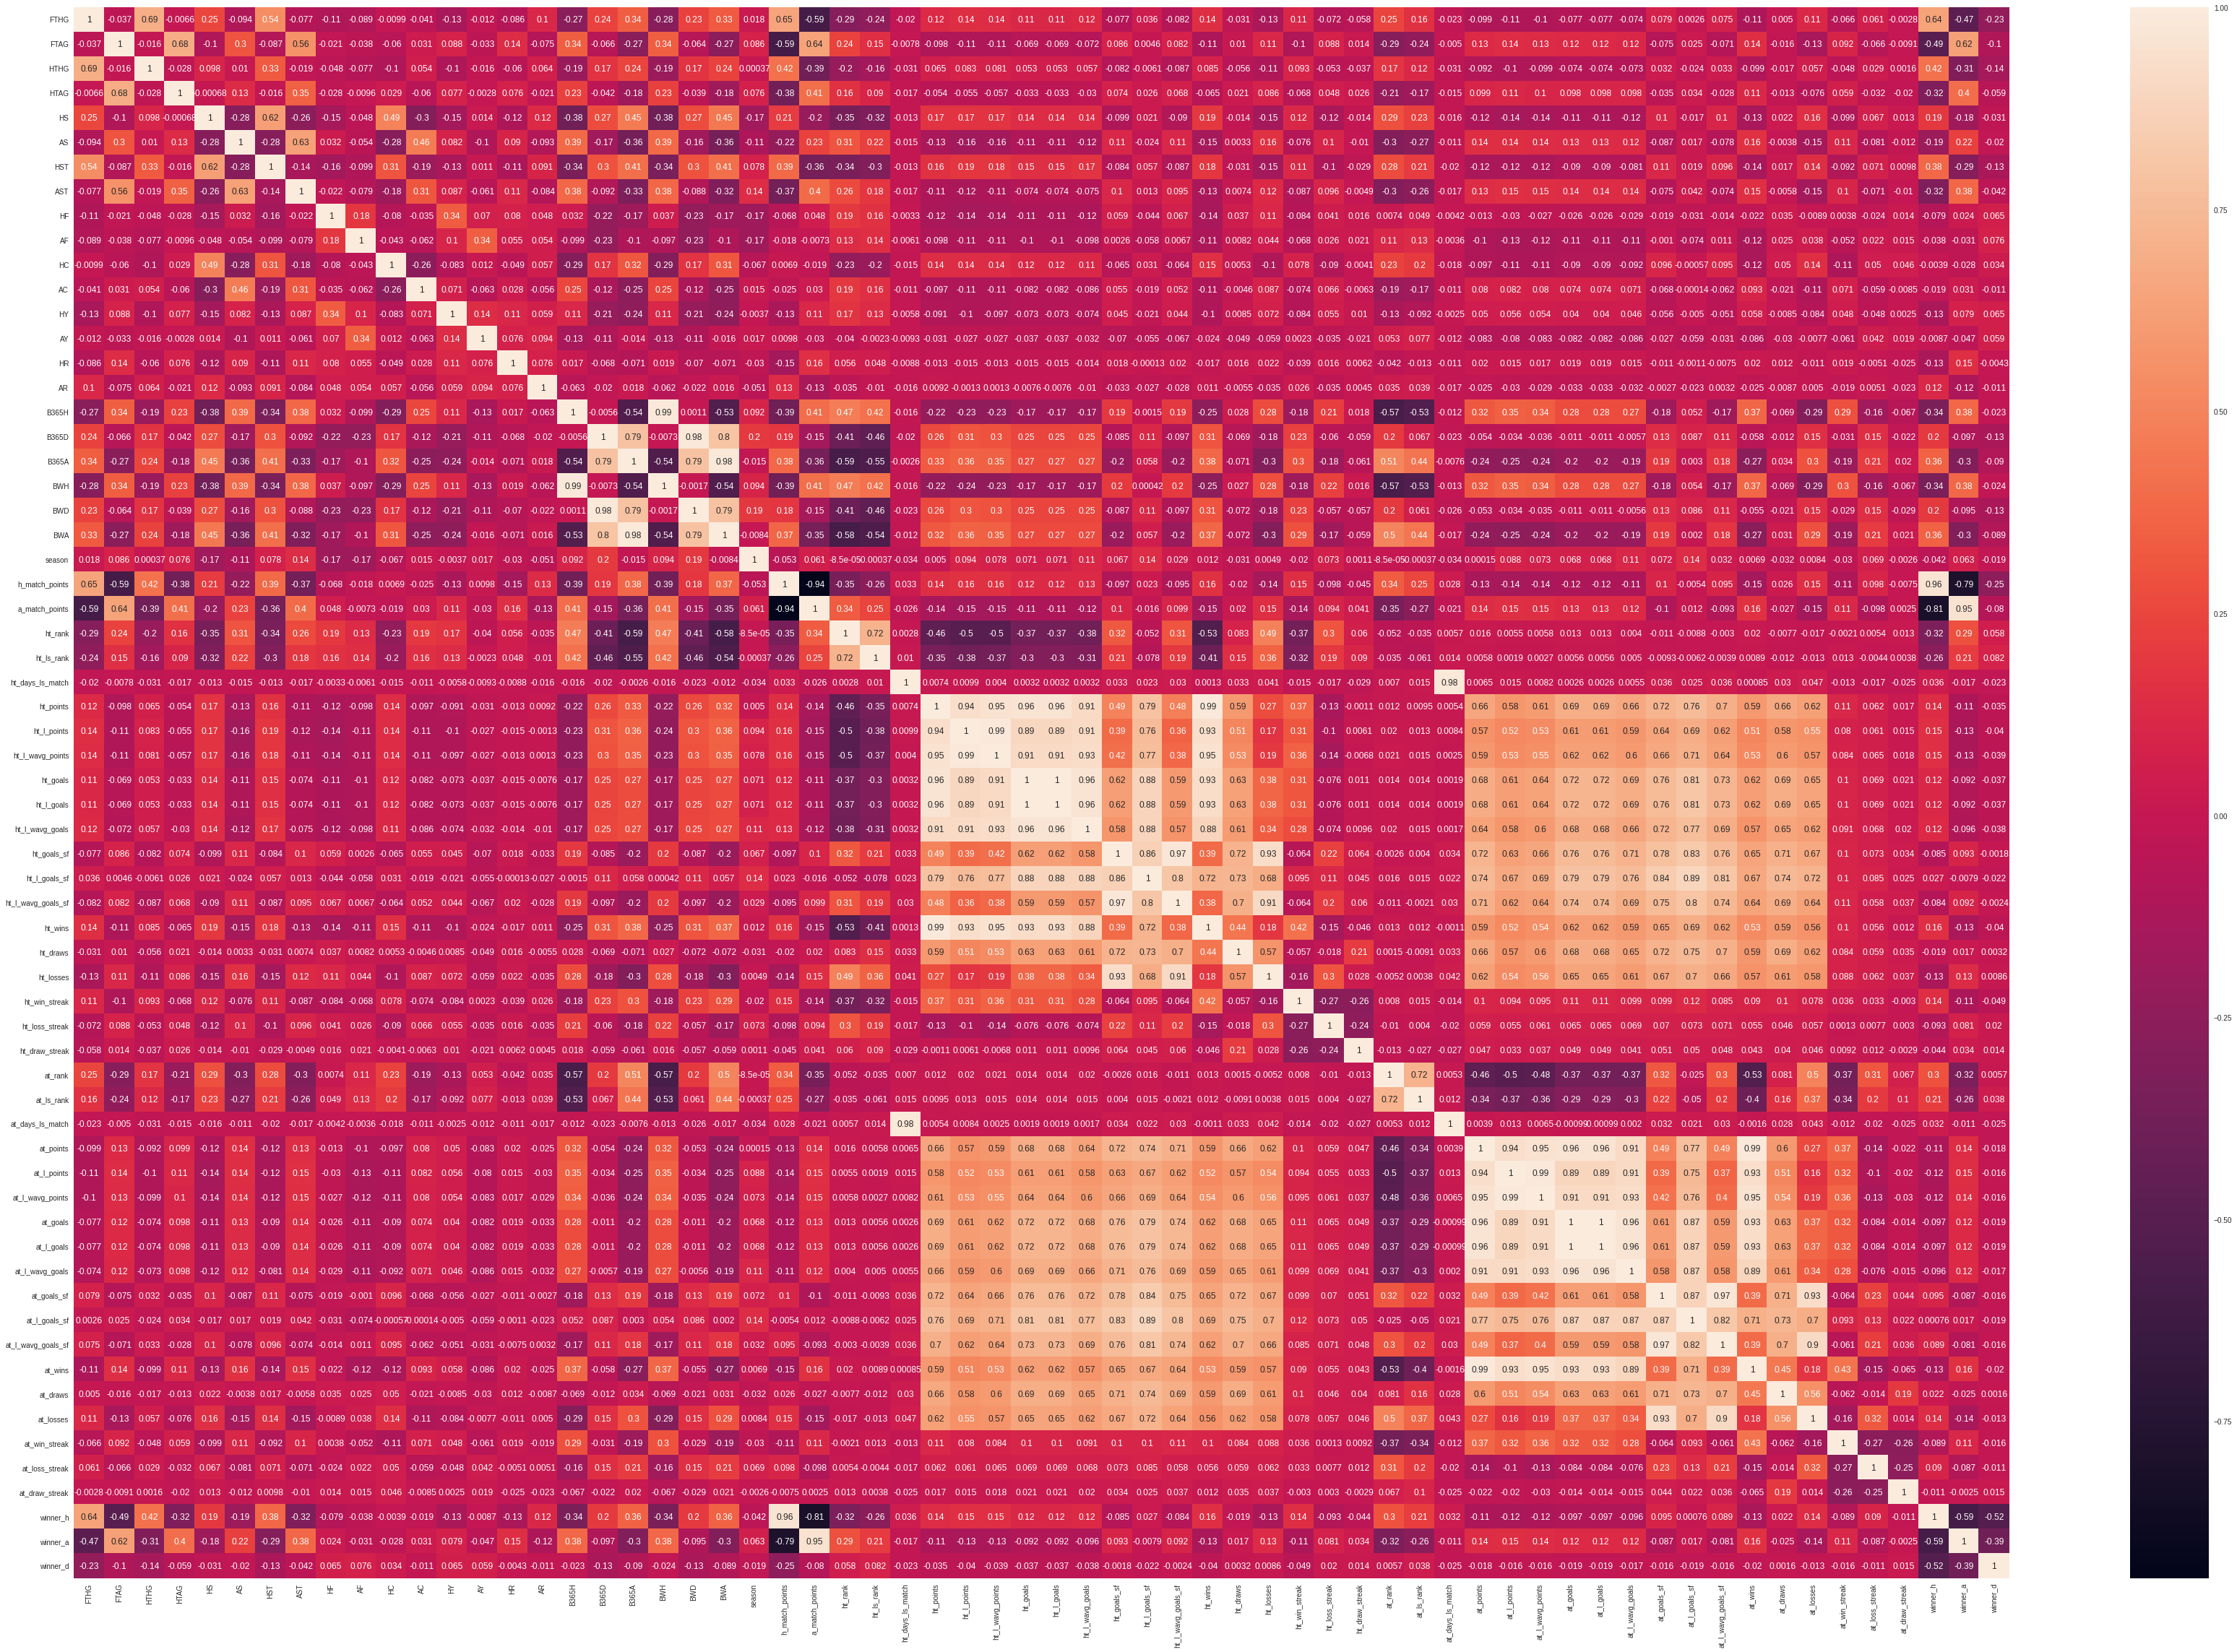

In [ ]:
plt.figure(figsize=(60,40)) 
sns.heatmap(df.corr(), annot= True)

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

# Pipeline 

## Drop Useless Columns

In [ ]:
# dropping columns one wouldn't have before an actual match

col_to_drop = ["Div", "BWH", "BWD", "BWA", 'B365H', 'B365D', 'B365A',
               "FTAG", "FTHG", "HTHG", "HTAG", "HTR",
               "HS", "AS", "HST", "AST", "HC", "AC", "HF", "AF", "HY", "AY", 
               "HR", "AR", "h_match_points", "a_match_points", 
               "winner_h", "winner_a", "winner_d"]

df.drop( columns = col_to_drop, inplace = True)

df['Date'] = df['Date'].astype(str)

#filling NAs
df.fillna(-33, inplace = True)

#turning the target variable into integers
df['FTR'] = np.where(df.FTR == 'H', 1, np.where(df.FTR == 'A', 2, 0))
df['ls_winner'] = np.where(df.ls_winner == 'H', 1, np.where(df.ls_winner == 'A', 2, 0))


# Get categorical and numerical
cols = df.columns
num_features = df._get_numeric_data().columns
cat_features = list(set(cols) - set(num_features))

print("Categorical:", cat_features)
print("Numerical:", num_features)

Categorical: ['Date', 'HomeTeam', 'AwayTeam']
Numerical: Index(['FTR', 'season', 'ht_rank', 'ht_ls_rank', 'ht_days_ls_match',
       'ht_points', 'ht_l_points', 'ht_l_wavg_points', 'ht_goals',
       'ht_l_goals', 'ht_l_wavg_goals', 'ht_goals_sf', 'ht_l_goals_sf',
       'ht_l_wavg_goals_sf', 'ht_wins', 'ht_draws', 'ht_losses',
       'ht_win_streak', 'ht_loss_streak', 'ht_draw_streak', 'at_rank',
       'at_ls_rank', 'at_days_ls_match', 'at_points', 'at_l_points',
       'at_l_wavg_points', 'at_goals', 'at_l_goals', 'at_l_wavg_goals',
       'at_goals_sf', 'at_l_goals_sf', 'at_l_wavg_goals_sf', 'at_wins',
       'at_draws', 'at_losses', 'at_win_streak', 'at_loss_streak',
       'at_draw_streak', 'ls_winner'],
      dtype='object')


In [ ]:
print(list(num_features.values))

['FTR', 'season', 'ht_rank', 'ht_ls_rank', 'ht_days_ls_match', 'ht_points', 'ht_l_points', 'ht_l_wavg_points', 'ht_goals', 'ht_l_goals', 'ht_l_wavg_goals', 'ht_goals_sf', 'ht_l_goals_sf', 'ht_l_wavg_goals_sf', 'ht_wins', 'ht_draws', 'ht_losses', 'ht_win_streak', 'ht_loss_streak', 'ht_draw_streak', 'at_rank', 'at_ls_rank', 'at_days_ls_match', 'at_points', 'at_l_points', 'at_l_wavg_points', 'at_goals', 'at_l_goals', 'at_l_wavg_goals', 'at_goals_sf', 'at_l_goals_sf', 'at_l_wavg_goals_sf', 'at_wins', 'at_draws', 'at_losses', 'at_win_streak', 'at_loss_streak', 'at_draw_streak', 'ls_winner']


## Pycaret

In [ ]:
r2 = setup(df, target = 'FTR', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= list(num_features.values).remove("FTR"))

,Description,Value
0,session_id,123
1,Target,FTR
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4185, 41)"
5,Missing Values,False
6,Numeric Features,26
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare_models()

In [ ]:
# Model Training and Validation 
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5563,0.6744,0.4907,0.5223,0.5024,0.2726,0.3002
1,0.5700,0.6702,0.5027,0.5458,0.5049,0.2942,0.3265
2,0.4812,0.6185,0.4129,0.4085,0.4237,0.1517,0.1656
3,0.5188,0.6860,0.4519,0.4718,0.4647,0.2131,0.2304
4,0.4846,0.6223,0.4248,0.4381,0.4438,0.1600,0.1710
5,0.5051,0.6381,0.4544,0.4792,0.4709,0.2004,0.2105
6,0.4812,0.6262,0.4262,0.4338,0.4428,0.1644,0.1718
7,0.5154,0.6895,0.4495,0.4789,0.4574,0.2057,0.2245
8,0.4983,0.6601,0.4390,0.4630,0.4557,0.1824,0.1951


In [ ]:
save_model(model, model_name = 'cloud_project_rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FTR',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5495,0.7054,0.5397,0.5642,0.5540,0.3178,0.3195
1,0.5256,0.7050,0.5016,0.5225,0.5239,0.2702,0.2702
2,0.4369,0.6268,0.4230,0.4577,0.4449,0.1483,0.1493
3,0.5324,0.6731,0.5240,0.5457,0.5366,0.2908,0.2922
4,0.4300,0.6290,0.4218,0.4520,0.4376,0.1396,0.1410
5,0.4608,0.6499,0.4518,0.4849,0.4690,0.1874,0.1892
6,0.4573,0.6384,0.4445,0.4747,0.4619,0.1794,0.1809
7,0.5427,0.7199,0.5219,0.5496,0.5439,0.3020,0.3033
8,0.4676,0.6939,0.4490,0.4844,0.4742,0.1916,0.1924


In [ ]:
# save transformation pipeline and model 
save_model(tuned_model, model_name = 'cloud_project_rf_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FTR',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
save_model(final_model, model_name = 'cloud_project_rf_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FTR',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
                                         max_features

## Mounting the Gdrive

We need to mount the google drive to read the data stored in google drive. Below is the simplest way to mount it. You will asked to enter the token generated by your access procedure. Here is the link to the article about [mounting gdrive](https://medium.com/@prajwal.prashanth22/google-colab-drive-as-persistent-storage-for-long-training-runs-cb82bc1d5b71)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create directory on google drive to save models locally. You can use temp paths.
import os

# MODIFICA PERCORSO
model_dir = '/content/drive/MyDrive/Cloud Computing/Project/Model/' #cloud_project_rf_tuned.pkl'
#os.makedirs(model_dir, exist_ok=True)

## Deploying trained Model on Google Cloud

Once, we have the trained model the next task is to deploy it to serve the clients. There are various deployment options available however in this section I focus on deploying it on Google Cloud AI platform. I try to use similar approach as followed in `pycaret` library for deploying on AWS. 

#### Pre-Requisite

The pre-requisite to deploy the tensorflow models on google cloud are

* Famialarity with Google Cloud Projects
* Basic understanding of storage buckets and it gsutil command line tool
* Basic Understanding of gcloud command line tool to interact with Google Cloud
* A Final Trained Model with pycaret 

> [Read the Guide](https://cloud.google.com/ai-platform/prediction/docs/deploying-models#scikit-learn-or-xgboost-model-file)

> [My Notes on Google Cloud Platform](https://ma-raza.netlify.app/post/ml_gcp/)


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# GCP project name, Change the name based on your own GCP project.

# CAMBIARE ID DEL PROGETTO CON IL PROPRIO
CLOUD_PROJECT = 'pippo1998'  # GCP project name Donato

# bucket name for storage of your model
bucket_name = CLOUD_PROJECT + '-bucket-model'
BUCKET = 'gs://' + CLOUD_PROJECT + '-{}'.format(bucket_name)
# Set the gcloud consol to $CLOUD_PROJECT Environment Variable for your Desired Project)
!gcloud config set project $CLOUD_PROJECT

Updated property [core/project].


In [ ]:
from google.cloud import storage

def create_bucket(project_name, bucket_name):
    """Creates a new bucket."""
    # bucket_name = "your-new-bucket-name"

    storage_client = storage.Client(project_name)

    buckets = storage_client.list_buckets()

    if bucket_name not in buckets:
      bucket = storage_client.create_bucket(bucket_name)
      print("Bucket {} created".format(bucket.name))
    else:
      raise FileExistsError('{} already exists'.format(bucket_name))


def upload_blob(project_name, bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # bucket_name = "your-bucket-name"
    # source_file_name = "local/path/to/file"
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client(project_name)
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

def download_blob(project_name, bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client(project_name)

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    
    if destination_file_name is not None: 
      blob.download_to_filename(destination_file_name)

      print(
          "Blob {} downloaded to {}.".format(
              source_blob_name, destination_file_name
          )
      )
    
  
    return blob

### Saving Model to GCP-Bucket

Using above utilities, use below code to uploda the model to GCP storage bucket.

In [ ]:
# Create Bucket
create_bucket(CLOUD_PROJECT, bucket_name)

Bucket pippo1998-bucket-model created


In [ ]:
# Save Model Local/google drive and upload to GCP
model_name_gcp = 'cloud_project_rf_tuned' #'cloud_project_rf_final'
#save_model(final_model, model_name= model_dir + model_name_gcp, verbose=False)
#save_model(tuned_model, model_name= model_dir + model_name_gcp, verbose=False)
model_src = model_dir + model_name_gcp +'.pkl'
model_dst = str(model_name_gcp)+'.pkl'

In [ ]:
upload_blob(CLOUD_PROJECT, bucket_name, model_src, model_dst)

File /content/drive/MyDrive/Cloud Computing/Project/Model/cloud_project_rf_tuned.pkl uploaded to cloud_project_rf_tuned.pkl.


## Encode Categorical Features

In [ ]:
df.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'season', 'ht_rank',
       'ht_ls_rank', 'ht_days_ls_match', 'ht_points', 'ht_l_points',
       'ht_l_wavg_points', 'ht_goals', 'ht_l_goals', 'ht_l_wavg_goals',
       'ht_goals_sf', 'ht_l_goals_sf', 'ht_l_wavg_goals_sf', 'ht_wins',
       'ht_draws', 'ht_losses', 'ht_win_streak', 'ht_loss_streak',
       'ht_draw_streak', 'at_rank', 'at_ls_rank', 'at_days_ls_match',
       'at_points', 'at_l_points', 'at_l_wavg_points', 'at_goals',
       'at_l_goals', 'at_l_wavg_goals', 'at_goals_sf', 'at_l_goals_sf',
       'at_l_wavg_goals_sf', 'at_wins', 'at_draws', 'at_losses',
       'at_win_streak', 'at_loss_streak', 'at_draw_streak', 'ls_winner'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()


mapping_dict = {}
#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    # output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # col_data = pd.get_dummies(col_data, prefix = col)
            # Encode labels in column 'Country'. 
            X[col]= label_encoder.fit_transform(X[col]) 

            le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
 
            mapping_dict[col] = le_name_mapping

    print(mapping_dict)       
        # Collect the revised columns
        # output = output.join(col_data)
    
    return X

df_dum = preprocess_features(df)
print ("Processed feature columns ({} total features):\n{}".format(len(df_dum.columns), list(df_dum.columns)))

df_dum

In [ ]:
import json 

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

with open("mapping_dict.json", "w") as outfile:
    json.dump(mapping_dict, outfile, cls=NpEncoder)

## Split Dataset

In [ ]:
X = df_dum.drop(columns = ['FTR'], axis = 1)
y = df_dum.FTR.values

#splitting into train and test set to check which model is the best one to work on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#scaling features
# scaler = MinMaxScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Explore Different Models

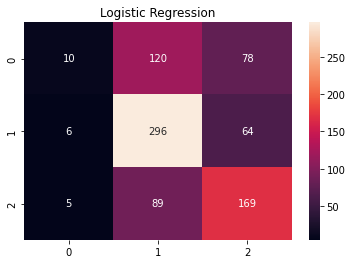

Logistic Regression : 0.447, +- 0.004  - Elapsed time:  3.0133955478668213


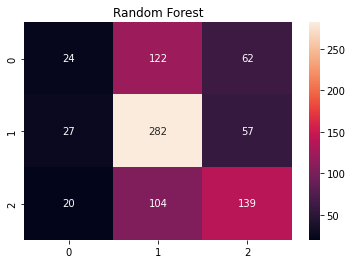

Random Forest : 0.455, +- 0.014  - Elapsed time:  5.303015470504761


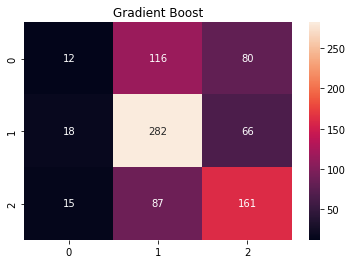

Gradient Boost : 0.449, +- 0.011  - Elapsed time:  29.756922721862793


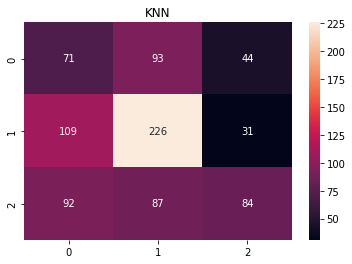

KNN : 0.416, +- 0.015  - Elapsed time:  0.5702509880065918


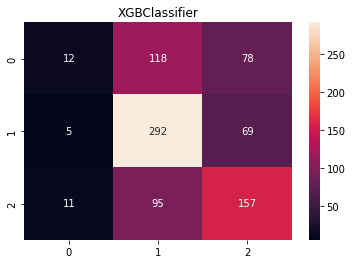

XGBClassifier : 0.447, +- 0.008  - Elapsed time:  5.791462659835815


In [ ]:
#creating models variable to iterate through each model and print result
models = [LogisticRegression(max_iter= 1000, multi_class = 'multinomial'),
RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier(seed=82) ]

names = ['Logistic Regression', 'Random Forest', 'Gradient Boost', 'KNN', "XGBClassifier"]

#loop through each model and print train score and elapsed time
for model, name in zip(models, names):
  start = time.time()   

  model.fit(X_train, y_train)
  # Predicting the Test set results
  Y_pred = model.predict(X_test)
  ax = plt.axes()
  sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True,fmt='d', ax=ax)
  ax.set_title(name)
  plt.show()

  scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=5)
  print(name, ":", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), " - Elapsed time: ", time.time() - start)

## Features Selection

In [ ]:
#Creating loop to test which set of features is the best one for Logistic Regression

acc_results = []
n_features = []

#best classifier on training data
clf = LogisticRegression(max_iter = 1000, multi_class = 'multinomial')

## Hyper-Parameter Tuning

In [ ]:
#tuning logistic regression

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'fit_intercept': (True, False), 'solver' : ('newton-cg', 'sag', 'saga', 'lbfgs'), 'class_weight' : (None, 'balanced')}

gs = RandomizedSearchCV(clf, parameters, scoring='f1_macro', cv=5) # scoring="accuracy"
start = time.time()

start = time.time()

In [ ]:
#printing best fits and time elapsed
gs.fit(X_train,y_train)
print(gs.best_score_, gs.best_params_,  time.time() - start)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

0.49155990129341004 {'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': 'balanced', 'C': 0.1} 42.47092342376709


KNeighborsClassifier()

## Testing Models

              precision    recall  f1-score   support

           0      0.259     0.202     0.227       208
           1      0.625     0.615     0.620       366
           2      0.524     0.627     0.571       263

    accuracy                          0.516       837
   macro avg      0.469     0.481     0.473       837
weighted avg      0.502     0.516     0.507       837



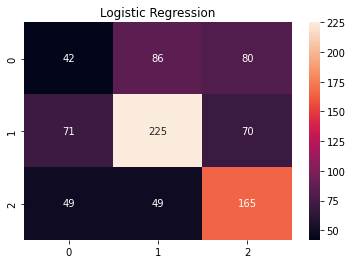

              precision    recall  f1-score   support

           0      0.214     0.072     0.108       208
           1      0.561     0.770     0.649       366
           2      0.549     0.551     0.550       263

    accuracy                          0.528       837
   macro avg      0.441     0.465     0.436       837
weighted avg      0.471     0.528     0.484       837



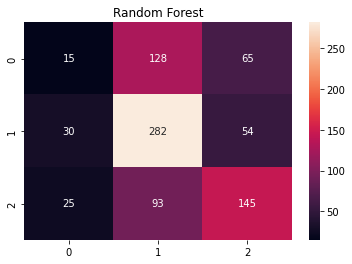

              precision    recall  f1-score   support

           0      0.250     0.053     0.087       208
           1      0.578     0.776     0.663       366
           2      0.520     0.597     0.556       263

    accuracy                          0.540       837
   macro avg      0.449     0.475     0.435       837
weighted avg      0.478     0.540     0.486       837



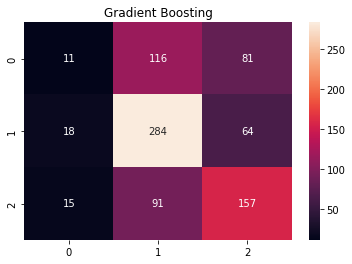

              precision    recall  f1-score   support

           0      0.261     0.341     0.296       208
           1      0.557     0.617     0.585       366
           2      0.528     0.319     0.398       263

    accuracy                          0.455       837
   macro avg      0.449     0.426     0.426       837
weighted avg      0.474     0.455     0.455       837



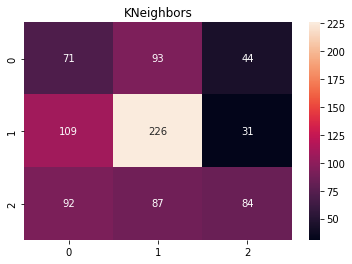

In [ ]:
#testing models on unseen data 
tpred_lr = gs.best_estimator_.predict(X_test)
tpred_rf = rf.predict(X_test)
tpred_gb = gb.predict(X_test)
tpred_knn = knn.predict(X_test)

print(classification_report(y_test, tpred_lr, digits = 3))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, tpred_lr), annot=True,fmt='d', ax=ax)
ax.set_title("Logistic Regression")
plt.show()

print(classification_report(y_test, tpred_rf, digits = 3))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, tpred_rf), annot=True,fmt='d', ax=ax)
ax.set_title("Random Forest")
plt.show()

print(classification_report(y_test, tpred_gb, digits = 3))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, tpred_gb), annot=True,fmt='d', ax=ax)
ax.set_title("Gradient Boosting")
plt.show()

print(classification_report(y_test, tpred_knn, digits = 3))
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, tpred_knn), annot=True,fmt='d', ax=ax)
ax.set_title("KNeighbors")
plt.show()

In [ ]:
import pickle
#Save model
pickle.dump(gs, open('lr_model.pkl', 'wb'))

In [40]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))
pickle.dump(gb, open('gb_model.pkl', 'wb'))
pickle.dump(knn, open('knn_model.pkl', 'wb'))
